In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
climate_df= pd.read_excel(r"E:\Michaelmas\BU7156- Analytics in Practice\Group Project\Pineapple dataset\Pineapples\Climate 2019-2022.xlsx", sheet_name="Climate 2019-2022")

In [3]:
climate_df.head()

,Time,Date,Week,Year,Radiation (W/m2),Temperature (°C),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Heat Index (°C),Relative Humidity (%),Average Relative Humidity (%),Maximum Relative Humidity(%),"Minimum Relative Humidity,(%)",Soil Humidity (%),Rain (mm)
0,00:00:00,2019-12-29,53.0,2019.0,0.0,24.2,24.25,24.5,24.1,25.28,99.9,99.9,99.9,99.9,88.17,0.2
1,00:30:00,2019-12-29,53.0,2019.0,0.0,24.0,24.1,24.4,23.8,25.06,99.9,99.9,99.9,99.9,88.19,0.4
2,01:00:00,2019-12-29,53.0,2019.0,0.0,24.0,23.92,24.1,23.7,25.06,99.9,99.9,99.9,99.9,88.18,0.6
3,01:30:00,2019-12-29,53.0,2019.0,0.0,23.9,24,24.1,23.9,24.95,99.9,99.9,99.9,99.9,88.17,0.4
4,02:00:00,2019-12-29,53.0,2019.0,0.0,23.9,23.94,24.2,23.6,24.95,99.9,99.9,99.9,99.9,88.15,0.2


In [4]:
climate_df.dtypes

Time                                     object
Date                             datetime64[ns]
Week                                    float64
Year                                    float64
Radiation (W/m2)                        float64
Temperature (°C)                        float64
Average Temperature (°C)                 object
Maximum Temperature (°C)                 object
Minimum Temperature (°C)                float64
Heat Index (°C)                          object
Relative Humidity (%)                    object
Average Relative Humidity (%)            object
Maximum Relative Humidity(%)            float64
Minimum Relative Humidity,(%)           float64
Soil Humidity (%)                        object
Rain (mm)                               float64
dtype: object

In [5]:
climate_df.tail()

,Time,Date,Week,Year,Radiation (W/m2),Temperature (°C),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Heat Index (°C),Relative Humidity (%),Average Relative Humidity (%),Maximum Relative Humidity(%),"Minimum Relative Humidity,(%)",Soil Humidity (%),Rain (mm)
38362,NaN,NaT,NaN,2022.0,0.0,20.8,20.9,21,20.8,21.5,99.9,99.9,99.9,99.9,80.3,0.0
38363,NaN,NaT,NaN,2022.0,0.0,20.9,20.8,20.9,20.7,21.7,99.9,99.9,99.9,99.9,78.8,0.0
38364,NaN,NaT,NaN,2022.0,1.0,20.8,20.9,21,20.8,21.5,99.9,99.9,99.9,99.9,76.7,0.0
38365,NaN,NaT,NaN,2022.0,13.6,21.2,20.9,21.2,20.8,22,99.9,99.9,99.9,99.9,75,0.0
38366,NaN,NaT,NaN,2022.0,45.9,21.7,21.4,21.7,21.1,22.5,99.9,99.9,99.9,99.9,73.9,0.0


In [6]:
climate_df.shape

(38367, 16)

In [7]:
climate_df.isnull().sum()

Time                                63
Date                                63
Week                                63
Year                              2577
Radiation (W/m2)                  6721
Temperature (°C)                 11152
Average Temperature (°C)          6750
Maximum Temperature (°C)          6750
Minimum Temperature (°C)          6763
Heat Index (°C)                  11161
Relative Humidity (%)            11161
Average Relative Humidity (%)    11161
Maximum Relative Humidity(%)     11161
Minimum Relative Humidity,(%)    11161
Soil Humidity (%)                11161
Rain (mm)                         6721
dtype: int64

In [8]:
# Removed Week 53 data
climate_remove_blank_week_df = climate_df.dropna(subset=['Week'])
climate_remove_blank_week_df = climate_df[(climate_df['Week']>=1) &(climate_df['Week']<=52)]

In [9]:
climate_remove_blank_week_df.isnull().sum()

Time                                 0
Date                                 0
Week                                 0
Year                              2577
Radiation (W/m2)                  6721
Temperature (°C)                 11152
Average Temperature (°C)          6750
Maximum Temperature (°C)          6750
Minimum Temperature (°C)          6763
Heat Index (°C)                  11161
Relative Humidity (%)            11161
Average Relative Humidity (%)    11161
Maximum Relative Humidity(%)     11161
Minimum Relative Humidity,(%)    11161
Soil Humidity (%)                11161
Rain (mm)                         6721
dtype: int64

In [10]:
climate_remove_blank_week_df.shape[0]

37824

In [11]:
# Data between 2019 & 2022 (inclusive - 2019 mostly week 53 so already filtered out)
climate_year_filtered_df = climate_remove_blank_week_df[(climate_remove_blank_week_df['Year'] >= 2019) & (climate_remove_blank_week_df['Year'] <= 2022)]

In [12]:
# Year b/w 2019-2022
climate_year_filtered_df['Year'].unique()

array([2020., 2021., 2022.])

In [13]:
climate_year_filtered_df.shape[0]

35247

In [14]:
climate_temp_filtered_df = climate_year_filtered_df[(climate_year_filtered_df['Average Temperature (°C)'] != '#REF!') & 
                                                     (climate_year_filtered_df['Average Temperature (°C)'] != 'NAN')&
                                                    (climate_year_filtered_df['Average Temperature (°C)'] != '')]
# Removes about 890 records for rainfall which have data else a minimal to zero affect on other climate factors data
climate_temp_filtered_df= climate_temp_filtered_df.dropna(subset = 'Average Temperature (°C)')

In [15]:
climate_temp_filtered_df.shape[0]

30936

In [16]:
climate_heat_index_filtered_df = climate_temp_filtered_df[(climate_temp_filtered_df['Heat Index (°C)'] != '2$.51')]

In [17]:
climate_heat_index_filtered_df.shape

(30935, 16)

In [18]:
climate_radiation_filtered_df = climate_heat_index_filtered_df.dropna(subset = 'Radiation (W/m2)')

In [19]:
climate_radiation_filtered_df.shape

(30934, 16)

In [20]:
# climate_avg_rel_humidity_filtered_df = climate_heat_index_filtered_df[(climate_heat_index_filtered_df['Average Relative Humidity (%)'] != 'NAN')]

In [21]:
# climate_avg_rel_humidity_filtered_df.shape[0]

In [22]:
climate_filtered_df = climate_radiation_filtered_df.copy()

In [23]:
climate_filtered_df['Date'] = pd.to_datetime(climate_filtered_df['Date'])
climate_date_formatted_df = climate_filtered_df.copy()
climate_date_formatted_df['Date'] = climate_date_formatted_df['Date'].dt.strftime('%Y-%m-%d')

In [24]:
# Convert Year and Week columns into 'yy-ww' format
climate_yw_formatted_df = climate_date_formatted_df.copy()
climate_date_formatted_df['Year'] = climate_date_formatted_df['Year'].astype(int)
climate_date_formatted_df['Week'] = climate_date_formatted_df['Week'].astype(int)
climate_yw_formatted_df['Year-Week'] = climate_date_formatted_df['Year'].astype(str) + '-' + climate_date_formatted_df['Week'].astype(str)

In [25]:
climate_yw_formatted_df.head()

,Time,Date,Week,Year,Radiation (W/m2),Temperature (°C),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Heat Index (°C),Relative Humidity (%),Average Relative Humidity (%),Maximum Relative Humidity(%),"Minimum Relative Humidity,(%)",Soil Humidity (%),Rain (mm),Year-Week
144,00:00:00,2020-01-01,1.0,2020.0,0.0,22.9,23.07,23.2,22.9,23.85,99.9,99.9,99.9,99.9,87.84,0.0,2020-1
145,00:30:00,2020-01-01,1.0,2020.0,0.0,23.0,22.89,23,22.8,23.96,99.9,99.9,99.9,99.9,87.81,0.0,2020-1
146,01:00:00,2020-01-01,1.0,2020.0,0.0,22.5,22.7,23,22.2,23.41,99.9,99.9,99.9,99.9,87.79,0.0,2020-1
147,01:30:00,2020-01-01,1.0,2020.0,0.0,22.6,22.59,22.8,22.4,23.52,99.9,99.9,99.9,99.9,87.73,0.0,2020-1
148,02:00:00,2020-01-01,1.0,2020.0,0.0,22.1,22.3,22.6,22.0,22.97,99.9,99.9,99.9,99.9,87.73,0.0,2020-1


In [26]:
climate_yw_formatted_df.dtypes

Time                              object
Date                              object
Week                             float64
Year                             float64
Radiation (W/m2)                 float64
Temperature (°C)                 float64
Average Temperature (°C)          object
Maximum Temperature (°C)          object
Minimum Temperature (°C)         float64
Heat Index (°C)                   object
Relative Humidity (%)             object
Average Relative Humidity (%)     object
Maximum Relative Humidity(%)     float64
Minimum Relative Humidity,(%)    float64
Soil Humidity (%)                 object
Rain (mm)                        float64
Year-Week                         object
dtype: object

In [27]:
# List of columns to convert to decimal
columns_to_convert = ['Radiation (W/m2)', 'Temperature (°C)', 'Average Temperature (°C)', 'Maximum Temperature (°C)','Minimum Temperature (°C)',
                      'Heat Index (°C)','Relative Humidity (%)','Average Relative Humidity (%)','Maximum Relative Humidity(%)','Minimum Relative Humidity,(%)',
                     'Soil Humidity (%)','Rain (mm)']

# Loop through the list of columns and convert each one to decimal (float)
for col in columns_to_convert:
    climate_yw_formatted_df[col] = pd.to_numeric(climate_yw_formatted_df[col], errors='coerce')  # 'coerce' turns invalid values into NaN

In [28]:
climate_yw_formatted_df.dtypes

Time                              object
Date                              object
Week                             float64
Year                             float64
Radiation (W/m2)                 float64
Temperature (°C)                 float64
Average Temperature (°C)         float64
Maximum Temperature (°C)         float64
Minimum Temperature (°C)         float64
Heat Index (°C)                  float64
Relative Humidity (%)            float64
Average Relative Humidity (%)    float64
Maximum Relative Humidity(%)     float64
Minimum Relative Humidity,(%)    float64
Soil Humidity (%)                float64
Rain (mm)                        float64
Year-Week                         object
dtype: object

In [29]:
climate_yw_formatted_df.shape

(30934, 17)

In [30]:
# Save DataFrame to excel
# climate_yw_formatted_df.to_excel('climate_2019_2022_outputfile.xlsx', index=False)

##### Merging Climate data

In [31]:
climate_2023_2024_df = pd.read_excel(r"E:\Michaelmas\BU7156- Analytics in Practice\Group Project\Pineapple dataset\Pineapples\cleaned\Climate 2023-2024(edited).xlsx")

In [32]:
climate_2023_2024_df.dtypes

Time                          object
Date                          object
Week                           int64
Year                           int64
Radiation (W/m2)               int64
Average Temperature (°C)     float64
Maximum Temperature (°C)     float64
Minimum Temperature (°C)     float64
Rain (mm)                    float64
UV index                     float64
Temperature Maximum Limit      int64
Temperature Minimum Limit      int64
Radiation (max)                int64
Rad +600                       int64
Year_Week                     object
dtype: object

In [33]:
climate_2023_2024_df['Radiation (W/m2)'] = climate_2023_2024_df['Radiation (W/m2)'].astype(float)

In [34]:
climate_2023_2024_df.dtypes

Time                          object
Date                          object
Week                           int64
Year                           int64
Radiation (W/m2)             float64
Average Temperature (°C)     float64
Maximum Temperature (°C)     float64
Minimum Temperature (°C)     float64
Rain (mm)                    float64
UV index                     float64
Temperature Maximum Limit      int64
Temperature Minimum Limit      int64
Radiation (max)                int64
Rad +600                       int64
Year_Week                     object
dtype: object

In [35]:
climate_2023_2024_df.head()

,Time,Date,Week,Year,Radiation (W/m2),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Rain (mm),UV index,Temperature Maximum Limit,Temperature Minimum Limit,Radiation (max),Rad +600,Year_Week
0,00:00:00,01-01-2023,1,2023,0.0,22.9,23.0,22.8,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
1,00:15:00,01-01-2023,1,2023,0.0,22.8,22.9,22.7,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
2,00:30:00,01-01-2023,1,2023,0.0,22.8,22.8,22.7,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
3,00:45:00,01-01-2023,1,2023,0.0,22.8,22.8,22.8,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
4,01:00:00,01-01-2023,1,2023,0.0,22.8,22.9,22.8,0.0,0.0,35,19,600,0,2025-01-23 00:00:00


In [36]:
climate_2023_2024_df['Date'] = pd.to_datetime(climate_2023_2024_df['Date'], format='%d-%m-%Y')

# Convert to string in yyyy-mm-dd format
climate_2023_2024_df['Date'] = climate_2023_2024_df['Date'].dt.strftime('%Y-%m-%d')

In [37]:
climate_2023_2024_df.head()

,Time,Date,Week,Year,Radiation (W/m2),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Rain (mm),UV index,Temperature Maximum Limit,Temperature Minimum Limit,Radiation (max),Rad +600,Year_Week
0,00:00:00,2023-01-01,1,2023,0.0,22.9,23.0,22.8,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
1,00:15:00,2023-01-01,1,2023,0.0,22.8,22.9,22.7,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
2,00:30:00,2023-01-01,1,2023,0.0,22.8,22.8,22.7,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
3,00:45:00,2023-01-01,1,2023,0.0,22.8,22.8,22.8,0.0,0.0,35,19,600,0,2025-01-23 00:00:00
4,01:00:00,2023-01-01,1,2023,0.0,22.8,22.9,22.8,0.0,0.0,35,19,600,0,2025-01-23 00:00:00


In [38]:
climate_2023_2024_df.tail()

,Time,Date,Week,Year,Radiation (W/m2),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Rain (mm),UV index,Temperature Maximum Limit,Temperature Minimum Limit,Radiation (max),Rad +600,Year_Week
65639,07:45:00,2024-11-25,48,2024,63.0,23.5,23.6,23.4,0.2,0.0,35,19,600,0,2024-48
65640,08:00:00,2024-11-25,48,2024,63.0,23.6,23.6,23.6,0.0,0.0,35,19,600,0,2024-48
65641,08:15:00,2024-11-25,48,2024,63.0,23.7,23.7,23.7,0.0,0.0,35,19,600,0,2024-48
65642,08:30:00,2024-11-25,48,2024,86.0,23.6,23.6,23.6,0.0,0.0,35,19,600,0,2024-48
65643,08:45:00,2024-11-25,48,2024,86.0,23.6,23.6,23.6,0.0,0.6,35,19,600,0,2024-48


In [39]:
climate_2023_2024_df.dtypes

Time                          object
Date                          object
Week                           int64
Year                           int64
Radiation (W/m2)             float64
Average Temperature (°C)     float64
Maximum Temperature (°C)     float64
Minimum Temperature (°C)     float64
Rain (mm)                    float64
UV index                     float64
Temperature Maximum Limit      int64
Temperature Minimum Limit      int64
Radiation (max)                int64
Rad +600                       int64
Year_Week                     object
dtype: object

In [40]:
merged_df = pd.concat([climate_yw_formatted_df, climate_2023_2024_df], ignore_index=True, sort=False)

In [41]:
merged_df.head()

,Time,Date,Week,Year,Radiation (W/m2),Temperature (°C),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Heat Index (°C),...,"Minimum Relative Humidity,(%)",Soil Humidity (%),Rain (mm),Year-Week,UV index,Temperature Maximum Limit,Temperature Minimum Limit,Radiation (max),Rad +600,Year_Week
0,00:00:00,2020-01-01,1.0,2020.0,0.0,22.9,23.07,23.2,22.9,23.85,...,99.9,87.84,0.0,2020-1,NaN,NaN,NaN,NaN,NaN,NaN
1,00:30:00,2020-01-01,1.0,2020.0,0.0,23.0,22.89,23.0,22.8,23.96,...,99.9,87.81,0.0,2020-1,NaN,NaN,NaN,NaN,NaN,NaN
2,01:00:00,2020-01-01,1.0,2020.0,0.0,22.5,22.70,23.0,22.2,23.41,...,99.9,87.79,0.0,2020-1,NaN,NaN,NaN,NaN,NaN,NaN
3,01:30:00,2020-01-01,1.0,2020.0,0.0,22.6,22.59,22.8,22.4,23.52,...,99.9,87.73,0.0,2020-1,NaN,NaN,NaN,NaN,NaN,NaN
4,02:00:00,2020-01-01,1.0,2020.0,0.0,22.1,22.30,22.6,22.0,22.97,...,99.9,87.73,0.0,2020-1,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
merged_df['Year'].unique()

array([2020., 2021., 2022., 2023., 2024.])

In [43]:
merged_df['Date'].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', ..., '2024-11-23',
       '2024-11-24', '2024-11-25'], dtype=object)

In [44]:
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df['Week'] = merged_df['Week'].astype(int)


In [45]:
# Save DataFrame to excel
# merged_df.to_excel('climate_outputfile.xlsx', index=False)

In [46]:
merged_df.dtypes

Time                              object
Date                              object
Week                               int32
Year                               int32
Radiation (W/m2)                 float64
Temperature (°C)                 float64
Average Temperature (°C)         float64
Maximum Temperature (°C)         float64
Minimum Temperature (°C)         float64
Heat Index (°C)                  float64
Relative Humidity (%)            float64
Average Relative Humidity (%)    float64
Maximum Relative Humidity(%)     float64
Minimum Relative Humidity,(%)    float64
Soil Humidity (%)                float64
Rain (mm)                        float64
Year-Week                         object
UV index                         float64
Temperature Maximum Limit        float64
Temperature Minimum Limit        float64
Radiation (max)                  float64
Rad +600                         float64
Year_Week                         object
dtype: object

In [47]:
merged_df.isnull().sum()

Time                                 0
Date                                 0
Week                                 0
Year                                 0
Radiation (W/m2)                     0
Temperature (°C)                 70046
Average Temperature (°C)             4
Maximum Temperature (°C)             1
Minimum Temperature (°C)            13
Heat Index (°C)                  70054
Relative Humidity (%)            70055
Average Relative Humidity (%)    70054
Maximum Relative Humidity(%)     70054
Minimum Relative Humidity,(%)    70054
Soil Humidity (%)                70055
Rain (mm)                            0
Year-Week                        65644
UV index                         30934
Temperature Maximum Limit        30934
Temperature Minimum Limit        30934
Radiation (max)                  30934
Rad +600                         30934
Year_Week                        30934
dtype: int64

In [48]:
merged_df.describe()

,Week,Year,Radiation (W/m2),Temperature (°C),Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Heat Index (°C),Relative Humidity (%),Average Relative Humidity (%),Maximum Relative Humidity(%),"Minimum Relative Humidity,(%)",Soil Humidity (%),Rain (mm),UV index,Temperature Maximum Limit,Temperature Minimum Limit,Radiation (max),Rad +600
count,96578.000000,96578.000000,96578.000000,26532.000000,96574.000000,96577.000000,96565.000000,26524.000000,26523.000000,26524.000000,26524.000000,26524.000000,26523.000000,96578.000000,65644.000000,65644.0,65644.0,65644.0,65644.000000
mean,24.827331,2022.548034,159.424332,25.614119,26.039861,26.309384,25.772796,30.705973,82.588802,82.613739,85.092392,79.939263,44.887994,0.114846,0.699871,35.0,19.0,600.0,0.099339
std,15.138240,1.452806,243.669702,3.436153,3.503189,3.643551,3.391571,11.232342,36.126994,35.208255,33.912586,38.147878,36.667850,0.840849,1.400962,0.0,0.0,0.0,0.299119
min,1.000000,2020.000000,0.000000,17.900000,16.800000,16.900000,-67.800000,16.760000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,35.0,19.0,600.0,0.000000
25%,11.000000,2021.000000,0.000000,23.100000,23.500000,23.600000,23.400000,23.400000,99.900000,99.900000,99.900000,99.900000,0.000000,0.000000,0.000000,35.0,19.0,600.0,0.000000
50%,24.000000,2023.000000,0.730000,24.500000,24.900000,25.100000,24.800000,25.170000,99.900000,99.900000,99.900000,99.900000,47.700000,0.000000,0.000000,35.0,19.0,600.0,0.000000
75%,38.000000,2024.000000,266.330000,28.100000,28.400000,28.900000,28.000000,36.700000,99.900000,99.900000,99.900000,99.900000,84.400000,0.000000,0.900000,35.0,19.0,600.0,0.000000
max,52.000000,2024.000000,1150.000000,61.000000,37.300000,37.800000,36.900000,83.620000,99.900000,99.900000,99.900000,99.900000,92.690000,37.800000,10.000000,35.0,19.0,600.0,1.000000


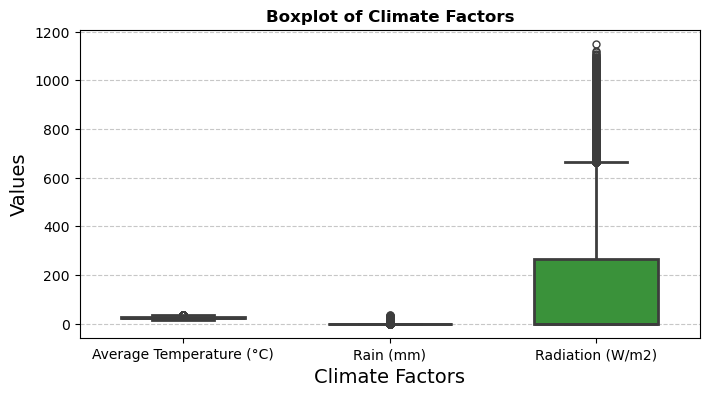

In [49]:
climate_factors = ['Average Temperature (°C)', 'Rain (mm)', 'Radiation (W/m2)']

plt.figure(figsize=(8, 4))

palette_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  
sns.boxplot(data=merged_df[climate_factors], palette=palette_colors, linewidth=2, width=0.6, fliersize=5)

# Add title and labels 
plt.title("Boxplot of Climate Factors", fontsize=12, fontweight='bold')
plt.xlabel("Climate Factors", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

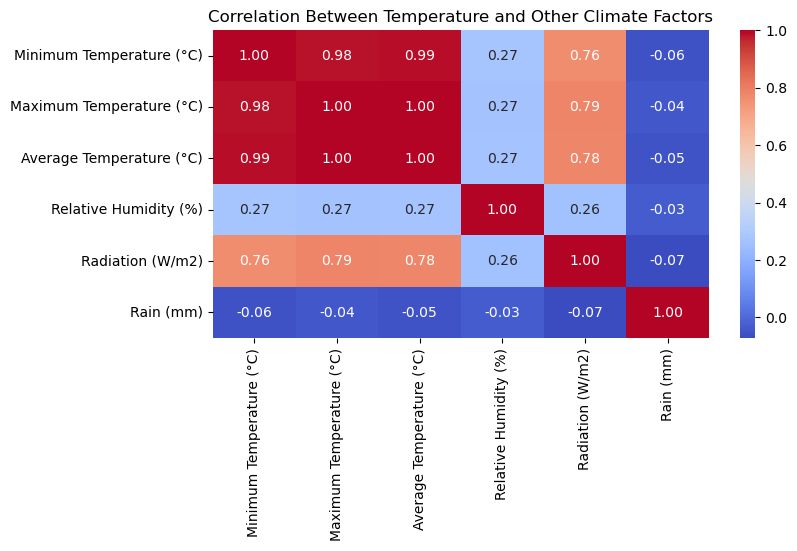

In [50]:
# Selecting relevant climate variables
climate_vars = ['Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Average Temperature (°C)', 
                'Relative Humidity (%)', 'Radiation (W/m2)', 'Rain (mm)']

corr_matrix = merged_df[climate_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Between Temperature and Other Climate Factors")
plt.show()

In [51]:
#### Analysis
# Temperature Trends →  warming trends & seasonal temperature variations.
# Rainfall Patterns → Identify wet & dry seasons, detect drought years.
# Solar Radiation Impact →  how sunlight affects temperature.

In [52]:
print(merged_df[['Date']].head(10))  # Shows the first 10 date values as they are
print(merged_df.dtypes)  # Shows the current data types


         Date
0  2020-01-01
1  2020-01-01
2  2020-01-01
3  2020-01-01
4  2020-01-01
5  2020-01-01
6  2020-01-01
7  2020-01-01
8  2020-01-01
9  2020-01-01
Time                              object
Date                              object
Week                               int32
Year                               int32
Radiation (W/m2)                 float64
Temperature (°C)                 float64
Average Temperature (°C)         float64
Maximum Temperature (°C)         float64
Minimum Temperature (°C)         float64
Heat Index (°C)                  float64
Relative Humidity (%)            float64
Average Relative Humidity (%)    float64
Maximum Relative Humidity(%)     float64
Minimum Relative Humidity,(%)    float64
Soil Humidity (%)                float64
Rain (mm)                        float64
Year-Week                         object
UV index                         float64
Temperature Maximum Limit        float64
Temperature Minimum Limit        float64
Radiation (max)           

First 5 rows of DataFrame:
       Time       Date  Week  Year  Radiation (W/m2)  Temperature (°C)  \
0  00:00:00 2020-01-01     1  2020               0.0              22.9   
1  00:30:00 2020-01-01     1  2020               0.0              23.0   
2  01:00:00 2020-01-01     1  2020               0.0              22.5   
3  01:30:00 2020-01-01     1  2020               0.0              22.6   
4  02:00:00 2020-01-01     1  2020               0.0              22.1   

   Average Temperature (°C)  Maximum Temperature (°C)  \
0                     23.07                      23.2   
1                     22.89                      23.0   
2                     22.70                      23.0   
3                     22.59                      22.8   
4                     22.30                      22.6   

   Minimum Temperature (°C)  Heat Index (°C)  ...  Soil Humidity (%)  \
0                      22.9            23.85  ...              87.84   
1                      22.8            23

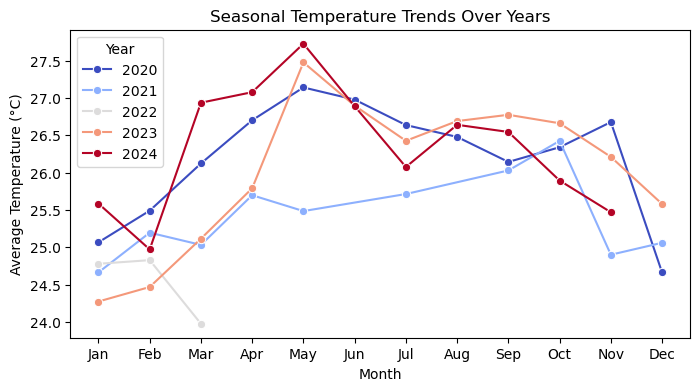

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure Proper Date Conversion
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')  # Handle wrong formats

# Step 2: Extract Year & Month
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

# Step 3: Ensure Temperature Columns Are Numeric
temp_cols = ['Average Temperature (°C)', 'Minimum Temperature (°C)', 'Maximum Temperature (°C)']
merged_df[temp_cols] = merged_df[temp_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Debugging - Check for Issues in the Data
print("First 5 rows of DataFrame:")
print(merged_df.head())

print("\nMissing values per column:")
print(merged_df.isna().sum())

# Step 5: Group Data & Compute Mean Temperatures
monthly_temp = merged_df.groupby(['Year', 'Month'])[temp_cols].mean().reset_index()

# Step 6: Debugging - Check Grouped Data
print("\nFirst 5 rows of grouped data (monthly_temp):")
print(monthly_temp.head())

# Step 7: Plot Seasonal Temperature Trends (Only if data exists)
if not monthly_temp.empty:
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=monthly_temp, x='Month', y='Average Temperature (°C)', hue='Year', palette="coolwarm", marker='o')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title("Seasonal Temperature Trends Over Years")
    plt.xlabel("Month")
    plt.ylabel("Average Temperature (°C)")
    plt.legend(title="Year")
    plt.show()
else:
    print("⚠ No data available for plotting. Check input data.")


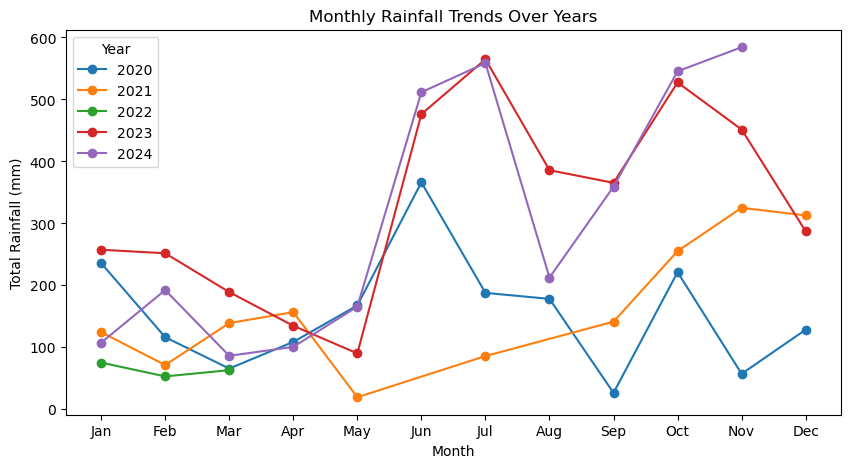

Driest Years: Year
2022     191.80
2021    1632.41
2020    1860.88
Name: Rain (mm), dtype: float64
Wetest Years: Year
2023    3981.90
2024    3424.60
2020    1860.88
Name: Rain (mm), dtype: float64


In [54]:
################ Analyze seasonal and yearly trends in rainfall to detect drought & flood periods.

merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)  

merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

monthly_rain = merged_df.groupby(['Year', 'Month'])['Rain (mm)'].sum().reset_index()

unique_years = sorted(monthly_rain['Year'].unique())
num_years = len(unique_years)

color_palette = sns.color_palette("tab10", num_years)  
year_colors = {year: color_palette[i % len(color_palette)] for i, year in enumerate(unique_years)}
plt.figure(figsize=(10, 5))

for year in unique_years:
    yearly_data = monthly_rain[monthly_rain['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Rain (mm)'], marker='o', linestyle='-', label=year, color=year_colors[year])

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Rainfall Trends Over Years")
plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.legend(title="Year")
plt.show()

yearly_rain = merged_df.groupby('Year')['Rain (mm)'].sum()
lowest_rain_years = yearly_rain.nsmallest(3)  # Get 3 driest years
highest_rain_years = yearly_rain.nlargest(3)  # Get 3 wetest years
print("Driest Years:", lowest_rain_years)
print("Wetest Years:", highest_rain_years)

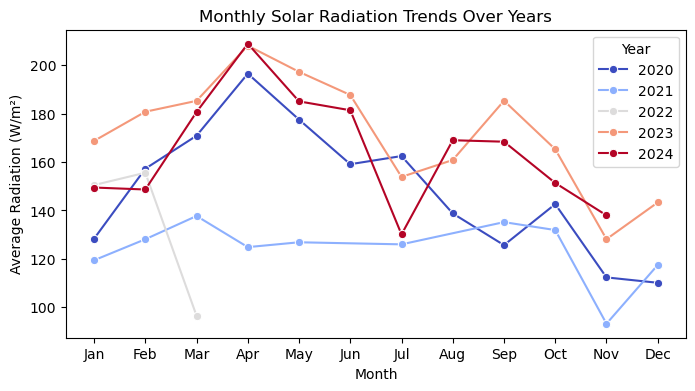

In [55]:
# Radiation trends over the years 

merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)

merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

# Group by Year & Month to compute average solar radiation
radiation_trends = merged_df.groupby(['Year', 'Month'])['Radiation (W/m2)'].mean().reset_index()

# Plot Solar Radiation Trends Over Years
plt.figure(figsize=(8, 4))
sns.lineplot(data=radiation_trends, x='Month', y='Radiation (W/m2)', hue='Year', marker='o', palette='coolwarm')
plt.xlabel("Month")
plt.ylabel("Average Radiation (W/m²)")
plt.title("Monthly Solar Radiation Trends Over Years")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.show()

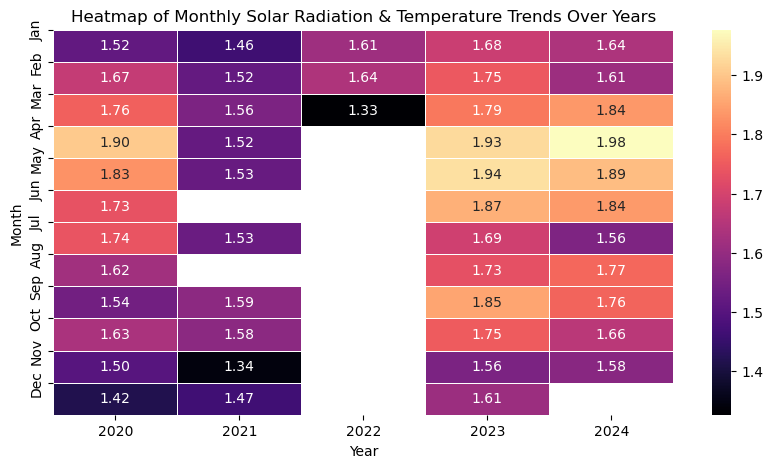

In [56]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

# Group by Year & Month to compute average solar radiation and temperature
climate_trends = merged_df.groupby(['Year', 'Month']).agg(
    Avg_Radiation=('Radiation (W/m2)', 'mean'),
    Avg_Temperature=('Average Temperature (°C)', 'mean')
).reset_index()

# Create a pivot table for a combined heatmap
climate_trends['Combined'] = climate_trends['Avg_Radiation'] / climate_trends['Avg_Radiation'].max() + \
                             climate_trends['Avg_Temperature'] / climate_trends['Avg_Temperature'].max()

heatmap_data = climate_trends.pivot(index="Month", columns="Year", values="Combined")
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Monthly Solar Radiation & Temperature Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Month")
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# heatmap value is:

# Solar Radiation (W/m²) normalized → Avg_Radiation / Max_Radiation
# Temperature (°C) normalized → Avg_Temperature / Max_Temperature
# Summed together → Ensures both factors contribute equally.
# Since both metrics are scaled between 0 and 1, their sum ranges from ~1.0 to 2.0

# Close to 2.0	-Extremely high solar radiation & high temperature.
# Around 1.5	🌤- Moderate solar radiation & temperature (normal climate).
# Around 1.0 - 1.2	❄- Lower solar radiation & temperature (cooler months, less sun).

C:\Users\Arushi\AppData\Local\Temp\ipykernel_26616\1196032964.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=long_events, x='Month', y=long_events['Duration'].dt.total_seconds() / 3600, hue='Year', palette=custom_palette, ci =None)


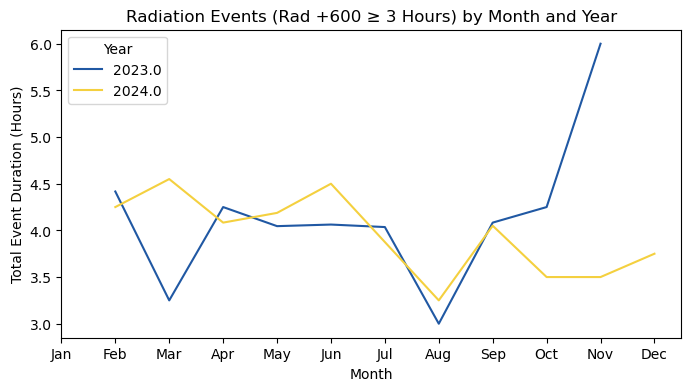

In [57]:
# Radiation + 600 for more than equal to 3 hours
# Yes, if Rad+600 > 600 W/m² for 3+ hours daily, it can cause stress.
# Prolonged exposure above 800 W/m² increases risks of sunburn & reduced fruit quality.

merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)

# Convert 'Time' to string, remove extra spaces, and standardize format
merged_df['Time'] = merged_df['Time'].astype(str).str.strip()

# Combine 'Date' with 'Time' to create a full DateTime column
merged_df['DateTime'] = pd.to_datetime(merged_df['Date'].astype(str) + ' ' + merged_df['Time'], errors='coerce')

# Ensure 'Rad +600' is numeric (some values might be NaN or non-numeric)
merged_df['Rad +600'] = pd.to_numeric(merged_df['Rad +600'], errors='coerce').fillna(0)

# Sort data by DateTime to maintain chronological order
merged_df = merged_df.sort_values(by='DateTime')

# Extract Year and Month for analysis
merged_df['Year'] = merged_df['DateTime'].dt.year
merged_df['Month'] = merged_df['DateTime'].dt.month

# Identify event groups where 'Rad +600' is continuously 1
merged_df['EventGroup'] = (merged_df['Rad +600'] != merged_df['Rad +600'].shift()).cumsum()

# Compute event durations
event_durations = merged_df.groupby(['Year', 'Month', 'EventGroup']).agg(
    StartTime=('DateTime', 'first'),
    EndTime=('DateTime', 'last'),
    Duration=('DateTime', lambda x: x.max() - x.min()),
    EventActive=('Rad +600', 'first')  
).reset_index()

# Filter for events lasting more than 3 hours
long_events = event_durations[(event_durations['EventActive'] == 1) & (event_durations['Duration'] >= pd.Timedelta(hours=3))]

custom_palette = ["#2058A3", "#F4D03F"] 

# Plot detected radiation events grouped by Year & Month
plt.figure(figsize=(8, 4))
sns.lineplot(data=long_events, x='Month', y=long_events['Duration'].dt.total_seconds() / 3600, hue='Year', palette=custom_palette, ci =None)

plt.xlabel("Month")
plt.ylabel("Total Event Duration (Hours)")
plt.title("Radiation Events (Rad +600 ≥ 3 Hours) by Month and Year")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.show()

In [58]:
# Display the events
print(long_events[['Year', 'Month', 'StartTime', 'EndTime', 'Duration']])

        Year  Month           StartTime             EndTime        Duration
32    2023.0    1.0 2023-01-03 09:15:00 2023-01-03 14:15:00 0 days 05:00:00
128   2023.0    1.0 2023-01-21 11:00:00 2023-01-21 14:00:00 0 days 03:00:00
192   2023.0    1.0 2023-01-31 09:15:00 2023-01-31 14:30:00 0 days 05:15:00
195   2023.0    2.0 2023-02-01 09:30:00 2023-02-01 12:30:00 0 days 03:00:00
327   2023.0    2.0 2023-02-21 11:00:00 2023-02-21 14:30:00 0 days 03:30:00
...      ...    ...                 ...                 ...             ...
3333  2024.0   10.0 2024-10-04 09:45:00 2024-10-04 13:00:00 0 days 03:15:00
3341  2024.0   10.0 2024-10-05 09:45:00 2024-10-05 13:15:00 0 days 03:30:00
3355  2024.0   10.0 2024-10-07 09:15:00 2024-10-07 13:30:00 0 days 04:15:00
3409  2024.0   10.0 2024-10-20 10:30:00 2024-10-20 13:30:00 0 days 03:00:00
3476  2024.0   11.0 2024-11-03 10:00:00 2024-11-03 13:45:00 0 days 03:45:00

[93 rows x 5 columns]
